In [1]:
from sklearn import datasets

In [2]:
digit_dataset = datasets.load_digits()

In [4]:
digit_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
print(digit_dataset["DESCR"])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [9]:
digit_dataset["data"][0].reshape(-1,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [10]:
digit_dataset["data"].shape

(1797, 64)

In [11]:
digit_dataset["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digit_dataset["images"][0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [14]:
digit_dataset["images"][0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

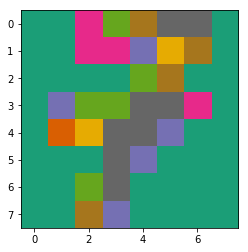

In [55]:
from matplotlib import pyplot as plt
plt.imshow(digit_dataset["images"][7],cmap=plt.cm.Dark2)
plt.show()

In [ ]:
X = digit_dataset["data"]
y = digit_dataset["target"]

In [21]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

In [24]:
logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = logreg_ovr.predict(X_test)
y_true = y_test

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  4,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 37,  1,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 48,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 50]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        41
          1       0.87      0.96      0.91        47
          2       1.00      0.98      0.99        45
          3       0.96      0.91      0.93        53
          4       1.00      0.95      0.97        37
          5       1.00      0.98      0.99        44
          6       1.00      0.97      0.99        40
          7       0.97      0.95      0.96        39
          8       0.87      0.94      0.91        51
          9       0.94      0.94      0.94        53

avg / total       0.96      0.96      0.96       450



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9555555555555556

In [32]:
y_pred = logreg_softmax.predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9622222222222222

In [39]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average="macro")


0.96303790004217427

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X, y, scoring="accuracy", cv=20, n_jobs=8).mean()

0.94667285182309835

In [31]:
cross_val_score(logreg_softmax, X, y, scoring="accuracy", cv=20, n_jobs=8).mean()

/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/mini

0.95166051434560883

## OneVsRestClassifier

In [40]:
from sklearn.multiclass import OneVsRestClassifier
y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9555555555555556

In [42]:
len(OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

10

## OneVsOneClassifier

In [43]:
from sklearn.multiclass import OneVsOneClassifier
y_pred = OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.97333333333333338

In [45]:
len(OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

45

In [ ]:
## http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [49]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
# Compute confusion matrix
class_names = digit_dataset["target_names"]
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  2,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 52]])

Confusion matrix, without normalization
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  1  1  1]
 [ 0  0  0  0 36  0  0  0  1  0]
 [ 0  0  0  0  0 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 37  2  0]
 [ 0  2  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  1 52]]
Normalized confusion matrix
[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.98  0.    0.    0.    0.    0.    0.    0.02  0.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.94  0.    0.    0.    0.02  0.02  0.02]
 [ 0.    0.    0.    0.    0.97  0.    0.    0.    0.03  0.  ]
 [ 0.    0.    0.    0.    0.    0.98  0.    0.    0.    0.02]
 [ 0.    0.03  0.    0.    0.    0.    0.97  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.95  0.05  0.  ]
 [ 0.    0.04  0.    0.    0.    0.    0.    0.    0.96  0.  ]
 [ 0.    0.    0.    0.    0.    0

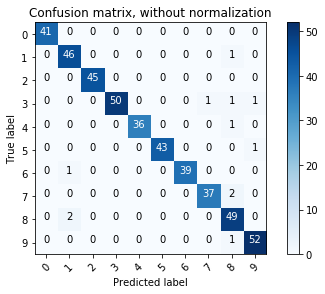

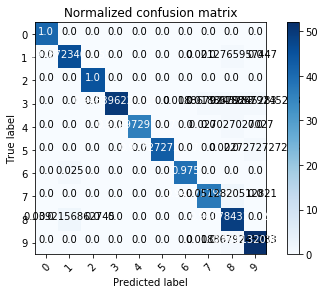

In [51]:
import numpy as np
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()